In [1]:
# Event 1 : June 8 - June 13
import pandas as pd
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import glob
import os
from pycorenlp import StanfordCoreNLP
import matplotlib.pyplot as plt

In [2]:
june8 = pd.read_csv("C:\\Users\\Afnan Anwar\\Desktop\\SPROJ\\Hate Speech\\DataSet\\Raw File\\june8.csv")
june9 = pd.read_csv("C:\\Users\\Afnan Anwar\\Desktop\\SPROJ\\Hate Speech\\DataSet\\Raw File\\june9.csv")
june10 = pd.read_csv("C:\\Users\\Afnan Anwar\\Desktop\\SPROJ\\Hate Speech\\DataSet\\Raw File\\june10.csv")
june11 = pd.read_csv("C:\\Users\\Afnan Anwar\\Desktop\\SPROJ\\Hate Speech\\DataSet\\Raw File\\june11.csv")
june12 = pd.read_csv("C:\\Users\\Afnan Anwar\\Desktop\\SPROJ\\Hate Speech\\DataSet\\Raw File\\june12.csv")
june13 = pd.read_csv("C:\\Users\\Afnan Anwar\\Desktop\\SPROJ\\Hate Speech\\DataSet\\Raw File\\june13.csv")
#df.astype('category')
#june8.tail()
#june9.tail()
#june10.tail()

In [3]:
frames = [june8,june9, june10, june11, june12, june13]
df = pd.concat(frames)
df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweeted_status,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,withheld_scope,withheld_copyright,withheld_in_countries,hate_speech
0,2020-06-08 01:34:30+00:00,1.269800e+18,1.269800e+18,"RT @LaineyGossip: In just one Spring Day, the ...",False,"[0, 140]","{'hashtags': [{'text': 'matchedamillion', 'ind...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,{'created_at': 'Mon Jun 08 01:18:43 +0000 2020...,NaN,1.270000e+18,1.270000e+18,"{'url': 'https://t.co/tARzGt8LCh', 'expanded':...",NaN,NaN,NaN,NaN,NaN
1,2020-06-08 04:50:45+00:00,1.269850e+18,1.269850e+18,RT @GiullianaMaria: This man is the owner of F...,False,"[0, 125]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,{'created_at': 'Fri Jun 05 00:52:52 +0000 2020...,NaN,1.270000e+18,1.270000e+18,"{'url': 'https://t.co/7xT4FDXG5m', 'expanded':...",NaN,NaN,NaN,NaN,NaN
2,2020-06-08 15:54:06+00:00,1.270020e+18,1.270020e+18,RT @taesnokia: why is everyone silent about th...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,{'created_at': 'Wed Jun 03 21:09:14 +0000 2020...,NaN,1.150000e+18,1.150000e+18,"{'url': 'https://t.co/npmkxN41Lg', 'expanded':...",NaN,NaN,NaN,NaN,NaN
3,2020-06-08 16:16:21+00:00,1.270030e+18,1.270030e+18,RT @LilNaanX: The NBA is not sinless. The orig...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,{'created_at': 'Sun Jun 07 17:49:21 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-06-08 23:27:51+00:00,1.270140e+18,1.270140e+18,"“YERRRRRRRR .... Dominicans, Puerto Rican’s, S...",False,"[0, 180]","{'hashtags': [{'text': 'blacklivesmatter', 'in...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,1.270000e+18,1.270000e+18,"{'url': 'https://t.co/tOMv2go5g9', 'expanded':...",{'created_at': 'Sun Jun 07 10:55:52 +0000 2020...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,2020-06-13 00:21:25+00:00,1.271599e+18,1.271599e+18,RT @mkultranews: Massive *silent* #BlackLivesM...,False,"[0, 108]","{'hashtags': [{'text': 'BlackLivesMatter', 'in...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,{'created_at': 'Sat Jun 13 00:04:19 +0000 2020...,"{'media': [{'id': 1271594168549142529, 'id_str...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1504,2020-06-13 09:58:50+00:00,1.271744e+18,1.271744e+18,RT @PinedoNRC: Ik sprak ex-profvoetballer Edga...,False,"[0, 139]","{'hashtags': [{'text': 'BlackLivesMatter', 'in...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,{'created_at': 'Fri Jun 12 19:40:20 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1505,2020-06-13 23:34:01+00:00,1.271949e+18,1.271949e+18,RT @MJMadda: The most amazing part of this Nur...,False,"[0, 140]","{'hashtags': [{'text': 'BlackLivesMatter', 'in...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,{'created_at': 'Fri Jun 12 05:22:33 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1506,2020-06-13 23:48:26+00:00,1.271953e+18,1.271953e+18,RT @StefanSonnerhed: Absolutely disgraceful!!,False,"[0, 45]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,{'created_at': 'Fri Jun 12 15:36:01 +0000 2020...,NaN,1.271447e+18,1.271447e+18,"{'url': 'https://t.co/1Bnu5uM4YQ', 'expanded':...",NaN,NaN,NaN,NaN,NaN


In [4]:
len(df.id.unique())

5113

In [5]:
# Dropping same tweets
df.drop_duplicates(subset=["full_text"],inplace=True)
#june8.drop(axis=1,inplace=True)
df=df[df.lang == 'en']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3472 entries, 0 to 1503
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 3472 non-null   object 
 1   id                         3472 non-null   float64
 2   id_str                     2866 non-null   float64
 3   full_text                  3472 non-null   object 
 4   truncated                  2866 non-null   object 
 5   display_text_range         2866 non-null   object 
 6   entities                   3472 non-null   object 
 7   source                     3472 non-null   object 
 8   in_reply_to_status_id      139 non-null    float64
 9   in_reply_to_status_id_str  139 non-null    float64
 10  in_reply_to_user_id        167 non-null    float64
 11  in_reply_to_user_id_str    167 non-null    float64
 12  in_reply_to_screen_name    167 non-null    object 
 13  user                       2866 non-null   objec

In [7]:
df.tail()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweeted_status,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,withheld_scope,withheld_copyright,withheld_in_countries,hate_speech
1486,2020-06-13 00:14:14+00:00,1.271597e+18,1.271597e+18,RT @Dani_Knope: @spacexbuns I registered. 2 fr...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,{'created_at': 'Sat Jun 13 00:09:47 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1487,2020-06-13 19:30:57+00:00,1.271888e+18,1.271888e+18,RT @flywithkamala: This is also why we march a...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,{'created_at': 'Sat Jun 13 19:14:19 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1500,2020-06-13 14:43:04+00:00,1.271815e+18,1.271815e+18,RT @SholaMos1: Are Police afraid for their liv...,False,"[0, 144]","{'hashtags': [{'text': 'PritiPatel', 'indices'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,{'created_at': 'Sat Jun 13 13:21:22 +0000 2020...,NaN,1.271775e+18,1.271775e+18,"{'url': 'https://t.co/WopOaUuMqc', 'expanded':...",NaN,NaN,NaN,NaN,NaN
1502,2020-06-13 21:00:39+00:00,1.271910e+18,1.271910e+18,RT @youknowit0609: #pritipatel last week Blac...,False,"[0, 140]","{'hashtags': [{'text': 'pritipatel', 'indices'...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,{'created_at': 'Sat Jun 13 20:39:38 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1503,2020-06-13 00:21:25+00:00,1.271599e+18,1.271599e+18,RT @mkultranews: Massive *silent* #BlackLivesM...,False,"[0, 108]","{'hashtags': [{'text': 'BlackLivesMatter', 'in...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,{'created_at': 'Sat Jun 13 00:04:19 +0000 2020...,"{'media': [{'id': 1271594168549142529, 'id_str...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Data Cleaning & Pre- Processing

import pandas as pd
import numpy as np
import re
import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob

#Taking a look at the data
df = df.copy()

#Remove '@ User from the 'text' col
def remove_users(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)

    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

df['tidy_tweet'] = df['full_text'].apply(lambda x: remove_users(x,"@ [\w]*", "@[\w]*"))

#Normalization
df['tidy_tweet'] = df['tidy_tweet'].str.lower()

# Remove all the hashtags from the text
def remove_hashtags(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)

    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: remove_hashtags(x,"# [\w]*", "#[\w]*"))

# Remove all links & URLs
def remove_links(tweet):
    tweet_no_link = re.sub(r"http\S+", "", tweet)
    return tweet_no_link

df['tidy_tweet'] = df['tidy_tweet'].apply(remove_links)

# Removing Punctuations, Numbers, and Special Characters
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

#Removing words with less than 3 characters
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))
# Preparing stopwords
from nltk.corpus import stopwords
stop = []





In [7]:
df.tail()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,withheld_scope,withheld_copyright,withheld_in_countries,hate_speech,tidy_tweet
1486,2020-06-13 00:14:14+00:00,1.271597e+18,1.271597e+18,RT @Dani_Knope: @spacexbuns I registered. 2 fr...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,registered free tickets took seconds ready hom...
1487,2020-06-13 19:30:57+00:00,1.271888e+18,1.271888e+18,RT @flywithkamala: This is also why we march a...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,this also march protest criminal justice syste...
1500,2020-06-13 14:43:04+00:00,1.271815e+18,1.271815e+18,RT @SholaMos1: Are Police afraid for their liv...,False,"[0, 144]","{'hashtags': [{'text': 'PritiPatel', 'indices'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,1.271775e+18,1.271775e+18,"{'url': 'https://t.co/WopOaUuMqc', 'expanded':...",NaN,NaN,NaN,NaN,NaN,police afraid their lives this what utterly di...
1502,2020-06-13 21:00:39+00:00,1.271910e+18,1.271910e+18,RT @youknowit0609: #pritipatel last week Blac...,False,"[0, 140]","{'hashtags': [{'text': 'pritipatel', 'indices'...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,last week black protestors were thugs criminal...
1503,2020-06-13 00:21:25+00:00,1.271599e+18,1.271599e+18,RT @mkultranews: Massive *silent* #BlackLivesM...,False,"[0, 108]","{'hashtags': [{'text': 'BlackLivesMatter', 'in...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,"{'media': [{'id': 1271594168549142529, 'id_str...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,massive silent protest march today


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3472 entries, 0 to 1503
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 3472 non-null   object 
 1   id                         3472 non-null   float64
 2   id_str                     2866 non-null   float64
 3   full_text                  3472 non-null   object 
 4   truncated                  2866 non-null   object 
 5   display_text_range         2866 non-null   object 
 6   entities                   3472 non-null   object 
 7   source                     3472 non-null   object 
 8   in_reply_to_status_id      139 non-null    float64
 9   in_reply_to_status_id_str  139 non-null    float64
 10  in_reply_to_user_id        167 non-null    float64
 11  in_reply_to_user_id_str    167 non-null    float64
 12  in_reply_to_screen_name    167 non-null    object 
 13  user                       2866 non-null   objec

In [8]:
# RQ 1- Dominant keywords associated with hate speech tweets and associated relevant attributes?
new = df[df['possibly_sensitive']== 1] # Using a data frame of only those tweets manually annotated as hate speech
new[['possibly_sensitive']]


,possibly_sensitive
608,1.0
711,1.0
739,1.0
821,1.0
966,1.0
998,1.0
1060,1.0
1321,1.0
1507,1.0
1528,1.0


In [9]:
# Keeping only the relevant columns for analysis:
new = new[['created_at','possibly_sensitive', 'tidy_tweet']]
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 608 to 1450
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          32 non-null     object 
 1   possibly_sensitive  32 non-null     float64
 2   tidy_tweet          32 non-null     object 
dtypes: float64(1), object(2)
memory usage: 768.0+ bytes


In [10]:
# importing libraries for topic modelling

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
from gensim.corpora import Dictionary

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

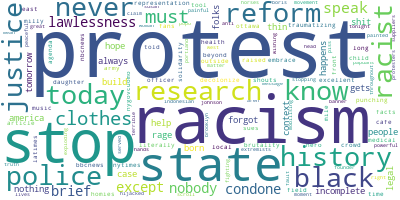

In [11]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(new['tidy_tweet'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=8000, contour_width=5, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [113]:
# Now the next step is for us to analyze the context of the tweets using the most common topics associated with hate speech as seen in the word cloud above

In [12]:
new[new['tidy_tweet'].str.contains('protest')]

,created_at,possibly_sensitive,tidy_tweet
1507,2020-06-08 05:48:49+00:00,1.0,crowd this protest literally mile long
1001,2020-06-11 19:23:58+00:00,1.0,portland protests aren stopping
1065,2020-06-12 06:52:44+00:00,1.0,protesters claim police fault exploding head m...
1232,2020-06-12 11:54:49+00:00,1.0,boris johnson anti racism protests hijacked ex...
79,2020-06-13 17:04:57+00:00,1.0,this protests right


In [13]:
new[new['tidy_tweet'].str.contains('racism')]

,created_at,possibly_sensitive,tidy_tweet
569,2020-06-10 04:44:42+00:00,1.0,excellent article from from about racism healt...
274,2020-06-11 09:37:58+00:00,1.0,time embrace reform agenda racism
1232,2020-06-12 11:54:49+00:00,1.0,boris johnson anti racism protests hijacked ex...


In [14]:
new[new['tidy_tweet'].str.contains('black')]

,created_at,possibly_sensitive,tidy_tweet
821,2020-06-08 14:44:27+00:00,1.0,brief incomplete history black people america ...
161,2020-06-12 15:45:47+00:00,1.0,know what does mean black lives matter piss popo


In [21]:
new[new['tidy_tweet'].str.contains('state')]

,created_at,possibly_sensitive,tidy_tweet
739,2020-06-08 09:22:52+00:00,1.0,nobody should condone lawlessness except your ...
306,2020-06-12 18:19:40+00:00,1.0,west papuans hands racist indonesian state


In [23]:
new[new['tidy_tweet'].str.contains('stop')]

,created_at,possibly_sensitive,tidy_tweet
1001,2020-06-11 19:23:58+00:00,1.0,portland protests aren stopping
89,2020-06-13 11:01:01+00:00,1.0,never stop fighting justice until justice serv...
531,2020-06-13 15:34:50+00:00,1.0,stop stop


In [13]:
# Calculating the average sentiment score of the hate speech tweets specific to the event:
def text_blob_sentiment(tweet):
    return TextBlob(tweet).polarity
sentiment = df['tidy_tweet'].map(text_blob_sentiment)
sentiment = sentiment.mean()

In [14]:
# For topic modelling, create a list of most commonly used stopwords:
f = open("C:\\Users\\Afnan Anwar\\Desktop\\SPROJ\\Hate Speech\\DataSet\\Raw File\\stopwords.txt",'r') 
for line in f:
    wrd = line.strip()
    stop.append(wrd)
f.close()

#Additional list based on commonly used stopwords specific to BLM dataframe:
additional  = ['from', 'https', 'twitter', 'religions', 'pic','twitt','','rt','rts','retweet']
swords = set().union(stopwords.words('english'),additional,stop)



In [15]:
# Now time for topic modelling:

from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

stemmer = SnowballStemmer('english')

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in swords and len(token) > 3:
            result.append((lemmatize_stemming(token)))
    return result

df['final_tweet'] = df['tidy_tweet'].map(preprocess)


In [16]:

# Build the bigram and trigram models

data = df['final_tweet'].values.tolist()
bigram = gensim.models.Phrases(data, min_count=5, threshold=50) # higher threshold fewer phrases.

trigram = gensim.models.Phrases(bigram[data], threshold=50)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Form Bigrams and Trigrams (phrases of two or three words that occur together and hence carry more meaning than a single word)
data_words_bigrams = make_bigrams(data)
data_words_trigrams = make_trigrams(data)

# Create Dictionary
id2word = Dictionary(data_words_trigrams)
print(len(id2word))
id2word.filter_extremes(no_below=5, no_above=0.99)
print(len(id2word))

# Create Corpus
texts = data_words_trigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

5074
1130


In [17]:
lda_model = gensim.models.LdaMulticore(corpus, num_topics=30, id2word=id2word, passes=25, workers=3)

In [18]:
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic : {idx} \nWords: {topic}\n")

Topic : 0 
Words: 0.101*"love" + 0.068*"even" + 0.034*"forget" + 0.021*"littl" + 0.018*"silenc" + 0.016*"girl" + 0.016*"feel" + 0.015*"like" + 0.015*"support" + 0.014*"decid"

Topic : 1 
Words: 0.060*"polic" + 0.055*"seattl" + 0.043*"fight" + 0.034*"happen" + 0.027*"citi" + 0.022*"matter" + 0.020*"violent" + 0.020*"mayor" + 0.019*"today" + 0.016*"communiti"

Topic : 2 
Words: 0.085*"want" + 0.036*"thank" + 0.028*"stay" + 0.026*"plan" + 0.025*"famili" + 0.023*"safe" + 0.018*"also" + 0.018*"help" + 0.017*"equal" + 0.016*"name"

Topic : 3 
Words: 0.025*"tonight" + 0.022*"make" + 0.020*"tweet" + 0.019*"everyth" + 0.019*"peopl" + 0.017*"like" + 0.016*"would" + 0.016*"statu" + 0.016*"protestor" + 0.015*"portland"

Topic : 4 
Words: 0.069*"help" + 0.041*"thread" + 0.036*"still" + 0.028*"share" + 0.027*"could" + 0.016*"make" + 0.015*"petit" + 0.015*"way" + 0.013*"someth" + 0.013*"mani"

Topic : 5 
Words: 0.057*"good" + 0.030*"racist" + 0.027*"peopl" + 0.025*"racism" + 0.025*"anyon" + 0.024*"wo

In [19]:
# Checking the quality of our model via coherence scores & perplexity scores:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

base_perplexity = lda_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity) 


Coherence Score:  0.4173526191610088

Perplexity:  -7.344311314223986


In [20]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
pyLDAvis.show(vis)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]

stopping Server...


In [87]:
# Now its time to work on the second part: Feature extraction
#1. Bigram-trigram matrices
#2. POS Tags
#3. Sentiment scores - stored in the 'sentiment' variable

#df.info()
#print(df[df['hate_speech']!= "NaN"])

new_copy = df['final_tweet'].copy()
#new_copy
print(new_copy.values.tolist())

[['spring', 'armi', 'rais', 'anoth', 'million', 'match', 'million', 'support'], ['owner', 'fair', 'oak', 'laundri', 'pasadena', 'make', 'sure', 'know', 'boycott'], ['everyon', 'silent', 'bulli', 'white', 'classmat', 'push', 'river', 'drown', 'murder'], ['sinless', 'origin', 'kaep', 'mahmoud', 'abdul', 'rauf', 'blackbal', 'prime', 'career'], ['yerrrrrrrr', 'dominican', 'puerto', 'rican', 'south', 'american', 'mexican', 'black', 'fuck', 'everyon', 'seem', 'forget'], [], ['donald', 'trump', 'star', 'hollywood', 'walk', 'fame', 'black', 'amid', 'protest'], ['liverpool', 'amaz', 'citi', 'built', 'slaveri', 'need', 'acknowledg', 'better', 'racist'], ['right', 'wing', 'motherfuck', 'terrorist', 'drove', 'crowd', 'shot', 'least', 'protestor', 'seattl'], ['okay', 'protest', 'today'], ['congressman', 'john', 'lewi', 'today', 'protest', 'front', 'white', 'hous', 'congressman', 'figh'], ['probabl', 'exist', 'condit'], ['glitter', 'monday', 'side'], ['fan', 'armi', 'match', 'group', 'million', 'don

In [89]:

new_copy = np.concatenate(new_copy.values.tolist())
#object = nltk.ngrams(new_copy, 2)
new_copy

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [57]:
len(new_copy)

26924

<AxesSubplot:>

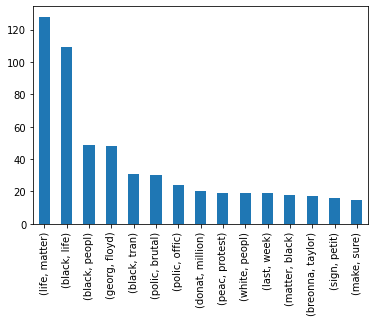

In [58]:
# Bigram model - top 15 
pd.Series(nltk.ngrams(new_copy, 2)).value_counts()[:15].plot(kind = 'bar')


<AxesSubplot:>

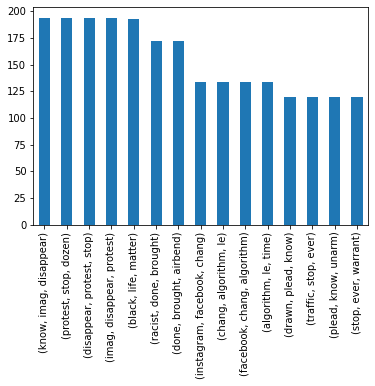

In [43]:
# Trigram model - top 15 
pd.Series(nltk.ngrams(new_copy, 3)).value_counts()[:15].plot(kind = 'bar')

In [90]:
bigramlist = pd.Series(nltk.ngrams(new_copy, 2)).tolist()
type(bigramlist)
bigramlist

# Unpacked tuples into bigrams:
list1 = [' '.join(x) for x in bigramlist]
list1

len(list1)

26923

In [91]:
trigramlist = pd.Series(nltk.ngrams(new_copy, 3)).tolist()
type(trigramlist)
trigramlist

# Unpacked tuples into bigrams:
list2 = [' '.join(x) for x in bigramlist]
list2

len(list2)

26923

In [92]:
# No of bigrams
from collections import Counter
dictionary = Counter(list1)
#dictionary = Dictionary(dictionary)

#from itertools import dropwhile

#for key, count in dropwhile(lambda key_count: key_count[1] >= 2, dictionary.most_common()):
 #   del dictionary[key]
    
# Count the bigram values in the data set and dropping the ones below 2:
new_dict = Counter(el for el in dictionary.elements() if dictionary[el] >= 2)


print(len(new_dict))
print(len(dictionary))
#bigram_list = dictionary.keys()


1775
23314


In [28]:
# Bigrams
pd.Series(nltk.ngrams(new_copy, 2)).nunique()

23314

In [93]:
from collections import Counter
dictionary_tri = Counter(list2)

new_dict2 = Counter(el for el in dictionary_tri.elements() if dictionary_tri[el] >= 3)


print(len(new_dict2))
print(len(dictionary_tri))


534
23314


In [30]:
# Tri grams
pd.Series(nltk.ngrams(new_copy, 3)).nunique()

26049

In [36]:
# Unigram
pd.Series(nltk.ngrams(new_copy, 1)).nunique()

7209

In [94]:
df['cleaned_tweet'] = df['final_tweet'].map(lambda x: ' '.join([str(elem) for elem in x]))



In [95]:
df['cleaned_tweet']

0       spring armi rais anoth million match million s...
1       owner fair oak laundri pasadena make sure know...
2       everyon silent bulli white classmat push river...
3       sinless origin kaep mahmoud abdul rauf blackba...
4       yerrrrrrrr dominican puerto rican south americ...
                              ...                        
1486    regist free ticket took second readi home even...
1487    also march protest crimin justic system alway ...
1500                      polic afraid life utter disgrac
1502    last week black protestor thug crimin week cau...
1503                    massiv silent protest march today
Name: cleaned_tweet, Length: 3472, dtype: object

In [96]:
# Each row has a count of occurences of a bigram
featurem = np.zeros(shape = (len(df['cleaned_tweet']), len(new_dict.keys()))) 
featurem.shape

(3472, 1775)

In [34]:

for i,tweet in enumerate(df['cleaned_tweet'].copy()):
    count = 0
    for j,bigram in enumerate (new_dict.keys()):
        count = tweet.count(bigram)
        featurem[i][j] = count



In [68]:
# Counts the max occurence of bigram in a particular tweet
featurem.max()
    

6.0

In [97]:
# Each row has a count of occurences of a bigram
featuret = np.zeros(shape = (len(df['cleaned_tweet']), len(new_dict2.keys()))) 
featuret.shape

(3472, 534)

In [36]:
for i,tweet in enumerate(df['cleaned_tweet'].copy()):
    count = 0
    for j,trigram in enumerate (new_dict2.keys()):
        countn = tweet.count(trigram)
        featuret[i][j] = countn

In [71]:
# Max occurence of trigram in a tweet
featuret.max()

6.0

In [72]:
#print(type(data_words_bigrams))
#print(data_words_bigrams) 
x = np.array(data_words_trigrams)
x = np.concatenate(x)
#plt.plot(data_words_trigrams)
#corpus

In [73]:
# Exploratory tri-gram features analysis:
import nltk

from collections import Counter

Counter(x)

Counter({'spring': 6,
         'armi': 64,
         'rais': 24,
         'anoth': 44,
         'million': 52,
         'match': 48,
         'support': 163,
         'owner': 16,
         'fair': 16,
         'oak': 3,
         'laundri': 3,
         'pasadena': 2,
         'make_sure': 15,
         'know': 100,
         'boycott': 2,
         'everyon': 47,
         'silent': 18,
         'bulli': 4,
         'white': 118,
         'classmat': 4,
         'push': 12,
         'river': 2,
         'drown': 2,
         'murder': 82,
         'sinless': 1,
         'origin': 12,
         'kaep': 1,
         'mahmoud': 1,
         'abdul': 1,
         'rauf': 1,
         'blackbal': 1,
         'prime': 6,
         'career': 4,
         'yerrrrrrrr': 1,
         'dominican': 1,
         'puerto': 2,
         'rican': 2,
         'south': 18,
         'american': 41,
         'mexican': 1,
         'black': 464,
         'fuck': 71,
         'seem': 12,
         'forget': 23,
         'don

In [ ]:
# Now its time for another feature extraction: POS tags

In [102]:
import nltk
#nltk.download('punkt')
tokens = nltk.word_tokenize(df['cleaned_tweet'].to_string())
print(tokens)

['0', 'spring', 'armi', 'rais', 'anoth', 'million', 'match', 'million', 's', '...', '1', 'owner', 'fair', 'oak', 'laundri', 'pasadena', 'make', 'sure', 'know', '...', '2', 'everyon', 'silent', 'bulli', 'white', 'classmat', 'push', 'river', '...', '3', 'sinless', 'origin', 'kaep', 'mahmoud', 'abdul', 'rauf', 'blackba', '...', '4', 'yerrrrrrrr', 'dominican', 'puerto', 'rican', 'south', 'americ', '...', '5', '6', 'donald', 'trump', 'star', 'hollywood', 'walk', 'fame', 'black', 'am', '...', '7', 'liverpool', 'amaz', 'citi', 'built', 'slaveri', 'need', 'acknowl', '...', '8', 'right', 'wing', 'motherfuck', 'terrorist', 'drove', 'crowd', 'sh', '...', '9', 'okay', 'protest', 'today', '10', 'congressman', 'john', 'lewi', 'today', 'protest', 'front', 'whit', '...', '13', 'probabl', 'exist', 'condit', '14', 'glitter', 'monday', 'side', '16', 'fan', 'armi', 'match', 'group', 'million', 'donat', 'respect', 'mig', '...', '17', 'hungri', 'east', 'black', 'own', 'eateri', 'berkeley', 'oakland', '...',

In [103]:
#nltk.download('averaged_perceptron_tagger')
#tokens = np.zeros(shape = (len(df['cleaned_tweet'])))  
#tokens.shape
print("Parts of speech tags: ", nltk.pos_tag(tokens))

Parts of speech tags:  [('0', 'CD'), ('spring', 'NN'), ('armi', 'NN'), ('rais', 'VBP'), ('anoth', 'DT'), ('million', 'CD'), ('match', 'NN'), ('million', 'CD'), ('s', 'NN'), ('...', ':'), ('1', 'CD'), ('owner', 'NN'), ('fair', 'JJ'), ('oak', 'JJ'), ('laundri', 'NN'), ('pasadena', 'NNS'), ('make', 'VBP'), ('sure', 'JJ'), ('know', 'VBP'), ('...', ':'), ('2', 'CD'), ('everyon', 'JJ'), ('silent', 'JJ'), ('bulli', 'NN'), ('white', 'JJ'), ('classmat', 'NN'), ('push', 'NN'), ('river', 'NN'), ('...', ':'), ('3', 'CD'), ('sinless', 'NN'), ('origin', 'NN'), ('kaep', 'FW'), ('mahmoud', 'NN'), ('abdul', 'NN'), ('rauf', 'NN'), ('blackba', 'NN'), ('...', ':'), ('4', 'CD'), ('yerrrrrrrr', 'JJ'), ('dominican', 'JJ'), ('puerto', 'NN'), ('rican', 'JJ'), ('south', 'NN'), ('americ', 'JJ'), ('...', ':'), ('5', 'CD'), ('6', 'CD'), ('donald', 'NN'), ('trump', 'NN'), ('star', 'NN'), ('hollywood', 'NN'), ('walk', 'NN'), ('fame', 'NN'), ('black', 'JJ'), ('am', 'VBP'), ('...', ':'), ('7', 'CD'), ('liverpool', 'NN

In [104]:
pos = nltk.pos_tag(tokens)
pos

[('0', 'CD'),
 ('spring', 'NN'),
 ('armi', 'NN'),
 ('rais', 'VBP'),
 ('anoth', 'DT'),
 ('million', 'CD'),
 ('match', 'NN'),
 ('million', 'CD'),
 ('s', 'NN'),
 ('...', ':'),
 ('1', 'CD'),
 ('owner', 'NN'),
 ('fair', 'JJ'),
 ('oak', 'JJ'),
 ('laundri', 'NN'),
 ('pasadena', 'NNS'),
 ('make', 'VBP'),
 ('sure', 'JJ'),
 ('know', 'VBP'),
 ('...', ':'),
 ('2', 'CD'),
 ('everyon', 'JJ'),
 ('silent', 'JJ'),
 ('bulli', 'NN'),
 ('white', 'JJ'),
 ('classmat', 'NN'),
 ('push', 'NN'),
 ('river', 'NN'),
 ('...', ':'),
 ('3', 'CD'),
 ('sinless', 'NN'),
 ('origin', 'NN'),
 ('kaep', 'FW'),
 ('mahmoud', 'NN'),
 ('abdul', 'NN'),
 ('rauf', 'NN'),
 ('blackba', 'NN'),
 ('...', ':'),
 ('4', 'CD'),
 ('yerrrrrrrr', 'JJ'),
 ('dominican', 'JJ'),
 ('puerto', 'NN'),
 ('rican', 'JJ'),
 ('south', 'NN'),
 ('americ', 'JJ'),
 ('...', ':'),
 ('5', 'CD'),
 ('6', 'CD'),
 ('donald', 'NN'),
 ('trump', 'NN'),
 ('star', 'NN'),
 ('hollywood', 'NN'),
 ('walk', 'NN'),
 ('fame', 'NN'),
 ('black', 'JJ'),
 ('am', 'VBP'),
 ('...', ':'

In [112]:
# Now its time to stack all the features into a single matrix:

featurem = tuple(map(tuple, featurem))
type(featurem)

featuret = tuple(map(tuple, featuret))
type(featuret)

pos = tuple(map(tuple, pos))
type(pos)

#print(str(featurem + featuret + pos))
#sentiment = tuple(map(tuple, sentiment))
matrixa = np.concatenate([featurem, featuret], axis = 1)
matrixa = tuple(map(tuple, matrixa))
matrixb = np.concatenate([pos], axis = 1)
matrixb = tuple(map(tuple, matrixb))
type(matrixa)
type(matrixb)
feature_matrix = matrixa + matrixb
#matrixb
#print(matrixa + matrixb)

In [116]:
# Now its time to move on to the modelling part:

In [132]:

# store the feature matrix (X) and response vector (y)
X = feature_matrix
y = feature_matrix.target
  
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
  
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

AttributeError: 'tuple' object has no attribute 'target'